<a href="https://colab.research.google.com/github/LDONoronha/MVP_analise_exploratoria_de_dados/blob/MVP/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Análise Exploratória e Pré-processamento de Dados

*   Aluno: Lucas de Oliveira Noronha
*   Dataset Escolhido: Air Quality Health Dataset (disponível no Kaggle)
*   Link para os Dados no GitHub: https://github.com/LDONoronha/MVP_analise_exploratoria_de_dados/blob/baa62fc674597d328aa2a9475f23a4f6542466c3/air_quality_health_dataset.csv

# Definição do Problema

O problema central é investigar a relação entre a poluição do ar e a saúde pública. Buscamos entender como as variações nos níveis de poluentes específicos (como PM2.5, Ozônio, etc.) impactam a ocorrência de problemas de saúde, medidos pelo número de internações hospitalares por doenças respiratórias, casos de doenças cardiovasculares e asma em diferentes cidades. O objetivo é quantificar essa relação e identificar quais poluentes são os mais prejudiciais.



## Hipóteses do Problema

Hipótese 1: Há uma correlação positiva forte entre o Índice de Qualidade do Ar (AQI) e todas as métricas de saúde. Ou seja, quanto pior a qualidade do ar,maior o número de casos de doenças.

Hipótese 2: Material particulado (PM2.5 e PM10) terá o impacto mais significativo nas internações por doenças respiratórias.

Hipótese 3: Pode haver uma diferença notável no impacto da poluição entre as diferentes cidades presentes no dataset.



## Tipo de Problema
Este é um problema de aprendizado supervisionado. O motivo é que temos variáveis de entrada bem definidas (os poluentes, como PM2.5, O3, etc.) e variável de saída (alvo) que queremos prever ou entender (hospital_admissions). Poderíamos, por exemplo, treinar um modelo para prever o número de internações hospitalares com base nos dados de qualidade do ar de um determinado dia. Especificamente, como as variáveis alvo são numéricas e contínuas, trata-se de um problema de regressão.



## Seleção dos Dados
Os dados foram selecionados de um repositório público (Kaggle) e não foram utilizadas informações de aulas anteriores, conforme solicitado. O dataset "Air Quality Health Dataset" foi escolhido pois permite uma análise rica e a aplicação de diversas técnicas de pré-processamento.

A análise está restrita aos dados contidos no dataset. Isso significa que as conclusões são válidas apenas para o período de tempo e para as cidades específicas presentes no arquivo. Não temos dados sobre outros fatores que podem influenciar a saúde, como fatores socioeconômicos, demográficos (idade da população) etc.



## Visão Geral do Dataset


*   **Cidades abrangidas:** Delhi, Pequim, Cidade do México, Los Angeles, Londres, Tóquio, Cairo, São Paulo
*   **As métricas incluem:** AQI, PM2.5, PM10, NO₂, O₃, temperatura, umidade, densidade populacional, capacidade hospitalar e internações hospitalares respiratórias diárias

## Atributos do Dataset

*   ***city:***	Nome da cidade onde os dados foram registrados
*   ***date***:	Data de observação (AAAA-MM-DD)
*   ***aqi***:	Valor do Índice de Qualidade do Ar
*   ***pm2_5***:	Concentração de PM2,5 (μg/m³)
*   ***pm10***:	Concentração de PM10 (μg/m³)
*   ***no2***:	Concentração de dióxido de nitrogênio (ppb)
*   ***o3***:	Concentração de ozônio (ppb)
*   ***temperature***:	Temperatura média diária (°C)
*   ***humidity***:	Umidade relativa média diária (%)
*   ***hospital_admissions***:	Número de internações hospitalares diárias por problemas respiratórios
*   ***population_density***:	Classificação urbana, suburbana ou rural
*   ***hospital_capacity***:	Número de leitos disponíveis em hospitais locais

# Importação das Bibliotecas Necessárias e Carga de Dados



In [47]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configurações para melhor visualização dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [48]:
# Carregamento do dataset
path = 'https://raw.githubusercontent.com/LDONoronha/MVP_analise_exploratoria_de_dados/refs/heads/MVP/air_quality_health_dataset.csv'
df = pd.read_csv(path)
print("Dataset carregado com sucesso!")

Dataset carregado com sucesso!


In [49]:
# primeiras linhas
df.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


# Análise de Dados

Nesta etapa de Análise Exploratória de Dados (EDA) aplicada ao conjunto de dados Air Quality Health Dataset, nosso objetivo é compreender a distribuição, as inter-relações e as principais características das variáveis. Essa compreensão é essencial para orientar as etapas seguintes de pré-processamento e modelagem preditiva.

## Total e Tipo das Instâncias

O dataset possui 88489 instâncias (linhas), com 12 atributos. Todas as colunas estão completas (sem valores nulos).
Observamos que a maioria das colunas é numérica (int64, float64), o que é esperado. No entanto, a coluna Date está como object (texto) e precisará ser convertida para o tipo datetime para permitir análises temporais. As colunas City e population_density são categóricas.

In [50]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 88489

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 88489 non-null  object 
 1   date                 88489 non-null  object 
 2   aqi                  88489 non-null  int64  
 3   pm2_5                88489 non-null  float64
 4   pm10                 88489 non-null  float64
 5   no2                  88489 non-null  float64
 6   o3                   88489 non-null  float64
 7   temperature          88489 non-null  float64
 8   humidity             88489 non-null  int64  
 9   hospital_admissions  88489 non-null  int64  
 10  population_density   88489 non-null  object 
 11  hospital_capacity    88489 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 8.1+ MB
None


## Estatísticas Descritivas


In [51]:
# Resumo estatístico dos atributos numéricos
print("Resumo estatístico dos atributos numéricos:")
df.describe()

Resumo estatístico dos atributos numéricos:


,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,hospital_capacity
count,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000
mean,249.370182,35.144951,50.118654,30.006211,39.978895,17.522962,56.950966,8.049385,1024.463165
std,144.479132,14.767994,19.796392,9.963139,12.007258,12.961024,21.629675,3.715458,561.978071
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,20.000000,0.000000,50.000000
25%,124.000000,24.900000,36.600000,23.300000,31.900000,6.400000,38.000000,6.000000,539.000000
50%,249.000000,35.100000,50.000000,30.000000,40.000000,17.500000,57.000000,8.000000,1026.000000
75%,374.000000,45.200000,63.500000,36.700000,48.100000,28.700000,76.000000,10.000000,1511.000000
max,499.000000,109.900000,143.500000,71.400000,93.500000,40.000000,94.000000,25.000000,1999.000000


Análise:

Podemos observar que:

**aqi** (Índice de Qualidade do Ar): O valor médio do AQI é de aproximadamente 249, com uma variação significativa (desvio padrão de 144,5). Os valores variam de 0 a 499. A mediana (249) é próxima da média, indicando uma distribuição relativamente simétrica. Os quartis (124, 249, 374) mostram a dispersão dos dados.

**pm2_5, pm10, no2, o3** (Concentrações de Poluentes): As concentrações desses poluentes apresentam valores médios (35.1, 50.1, 30.0, 39.9, respectivamente) e variações (desvios padrão) que indicam a diversidade dos níveis de poluição no dataset. Os valores mínimos são 0 e os máximos variam para cada poluente.

**temperature** (Temperatura): A temperatura média é de cerca de 17.5°C, com uma amplitude considerável (mínimo de -5°C e máximo de 40°C). O desvio padrão de 13.0 mostra a variabilidade da temperatura ao longo do tempo e/ou nas diferentes cidades.

**humidity** (Umidade): A umidade média é de aproximadamente 57%, variando de 20% a 94%. O desvio padrão de 21.6 sugere uma dispersão moderada dos dados de umidade.

**hospital_admissions** (Internações Hospitalares): O número médio de internações diárias é de cerca de 8, com um desvio padrão de 3.7. O mínimo é 0 e o máximo é 25. A distribuição parece concentrada em torno da média, com alguns dias tendo mais internações.

**hospital_capacity** (Capacidade Hospitalar): A capacidade hospitalar média é de aproximadamente 1024 leitos, com um desvio padrão de 562. Os valores variam bastante, de 50 a 1999, o que é esperado para diferentes cidades.

## Visualizações

Agora, vamos usar gráficos para entender melhor a distribuição dos dados e as relações entre as variáveis.

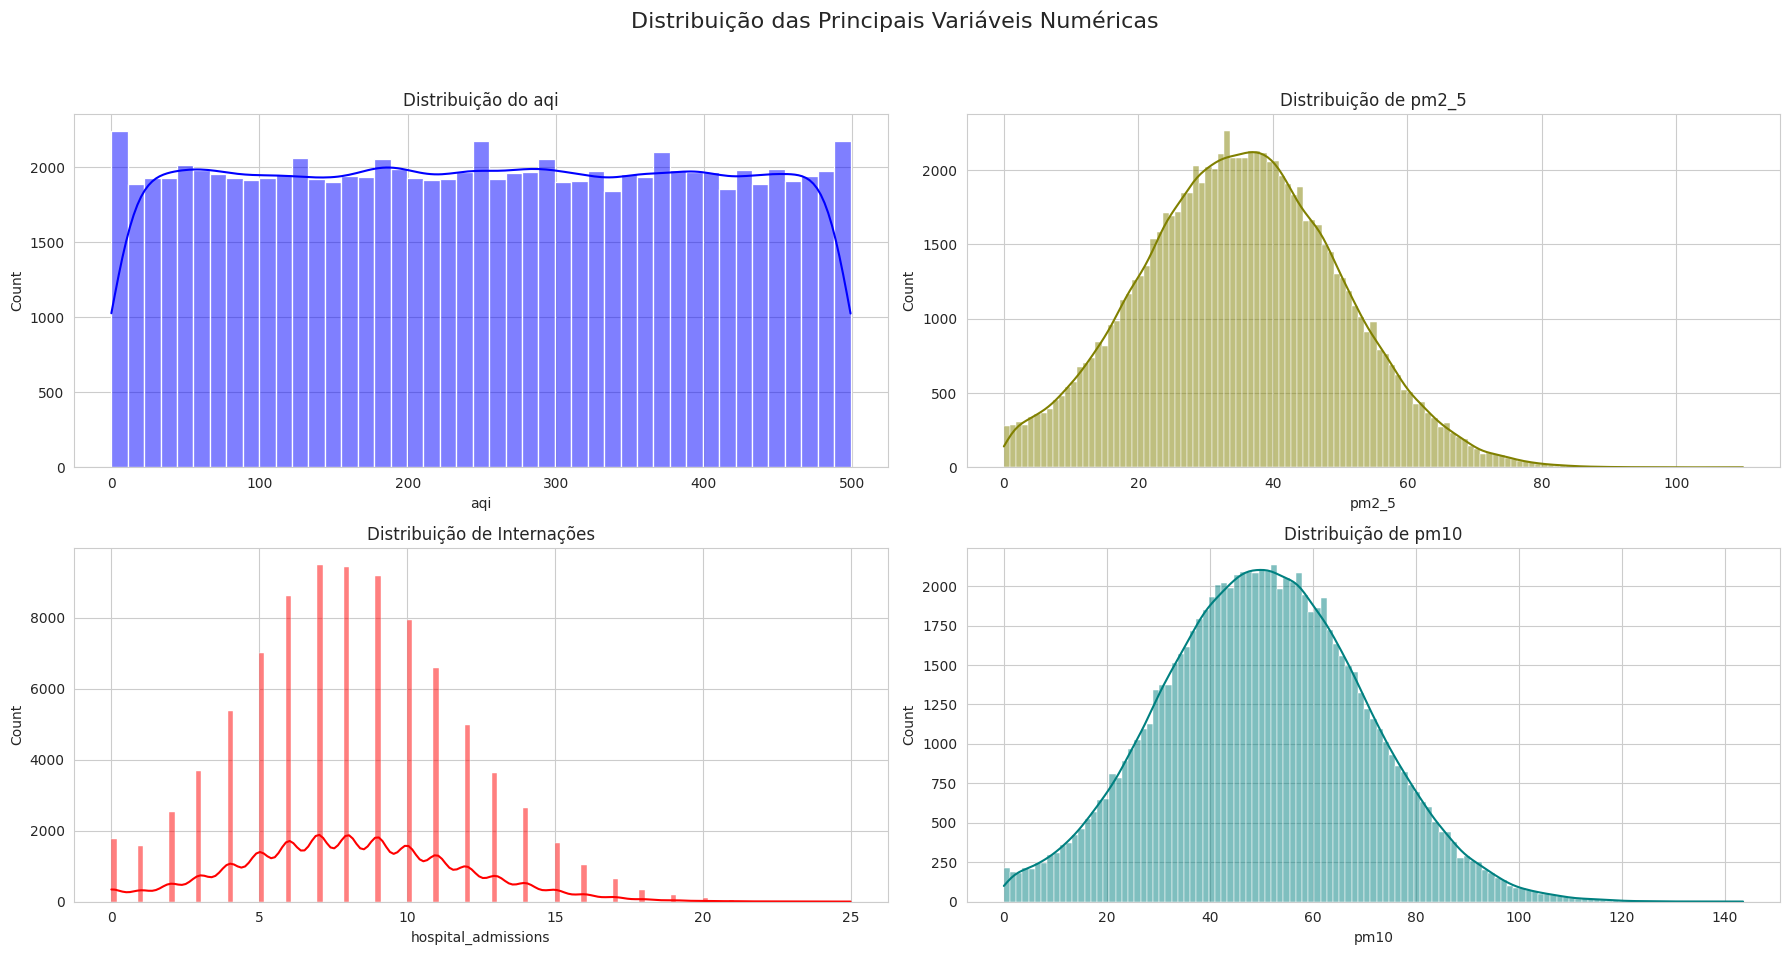

In [52]:
# Histogramas das principais variáveis
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Distribuição das Principais Variáveis Numéricas', fontsize=16)

sns.histplot(df['aqi'], kde=True, ax=axes[0, 0], color='blue').set_title('Distribuição do aqi')
sns.histplot(df['pm2_5'], kde=True, ax=axes[0, 1], color='olive').set_title('Distribuição de pm2_5')
sns.histplot(df['hospital_admissions'], kde=True, ax=axes[1, 0], color='red').set_title('Distribuição de Internações')
sns.histplot(df['pm10'], kde=True, ax=axes[1, 1], color='teal').set_title('Distribuição de pm10')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Análise:

**Distribuição do aqi**: O histograma do AQI parece apresentar uma distribuição aproximadamente uniforme ao longo da faixa de valores, com talvez uma ligeira concentração em torno de valores mais baixos e mais altos, mas sem picos muito pronunciados. Isso sugere que os dados de qualidade do ar estão distribuídos de forma relativamente ampla no dataset.

**Distribuição de pm2_5:** A distribuição de PM2.5 parece ser mais concentrada em valores mais baixos, com uma cauda se estendendo para a direita (assimetria positiva). A maioria das observações tem níveis mais baixos de PM2.5, com menos ocorrências de níveis muito altos.

**Distribuição de Internações (hospital_admissions):** O histograma mostra a frequência de diferentes contagens de internações. Podemos observar que as contagens mais frequentes estão concentradas em torno da média (cerca de 8, como vimos nas estatísticas descritivas). A distribuição parece ter um formato que lembra uma distribuição normal, mas com uma cauda mais longa para a direita. Isso significa que, embora a maioria das observações tenha um número de internações próximo à média, existem alguns casos menos frequentes com um número significativamente maior de internações. A barra mais alta indica o número de internações que ocorreu com maior frequência no dataset.

**Distribuição de pm10:** Similar ao PM2.5, a distribuição de PM10 também parece ter uma concentração maior em valores mais baixos e uma cauda se estendendo para a direita. Isso indica que níveis mais baixos de PM10 são mais frequentes no dataset.

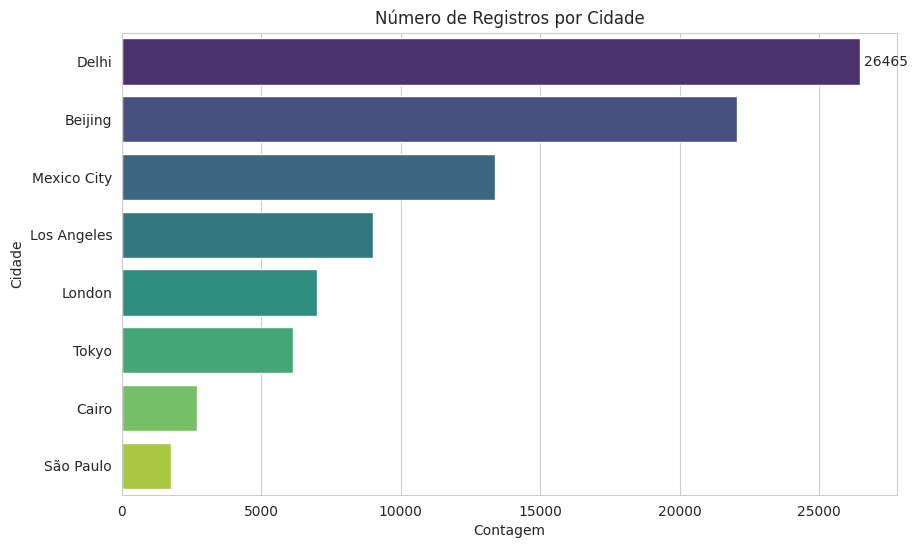

In [53]:
# Distribuição de frequência das cidades
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='city', data=df, order=df['city'].value_counts().index, palette='viridis')
plt.title('Número de Registros por Cidade')
plt.xlabel('Contagem')
plt.ylabel('Cidade')

# Adicionar rótulos às barras
ax.bar_label(ax.containers[0], fmt='%d', padding=3)

plt.show()

O gráfico mostra que o dataset contém grandes diferenças na contagem de registros entre as cidades, indicando que há um desbalanceamento em termos de classes.

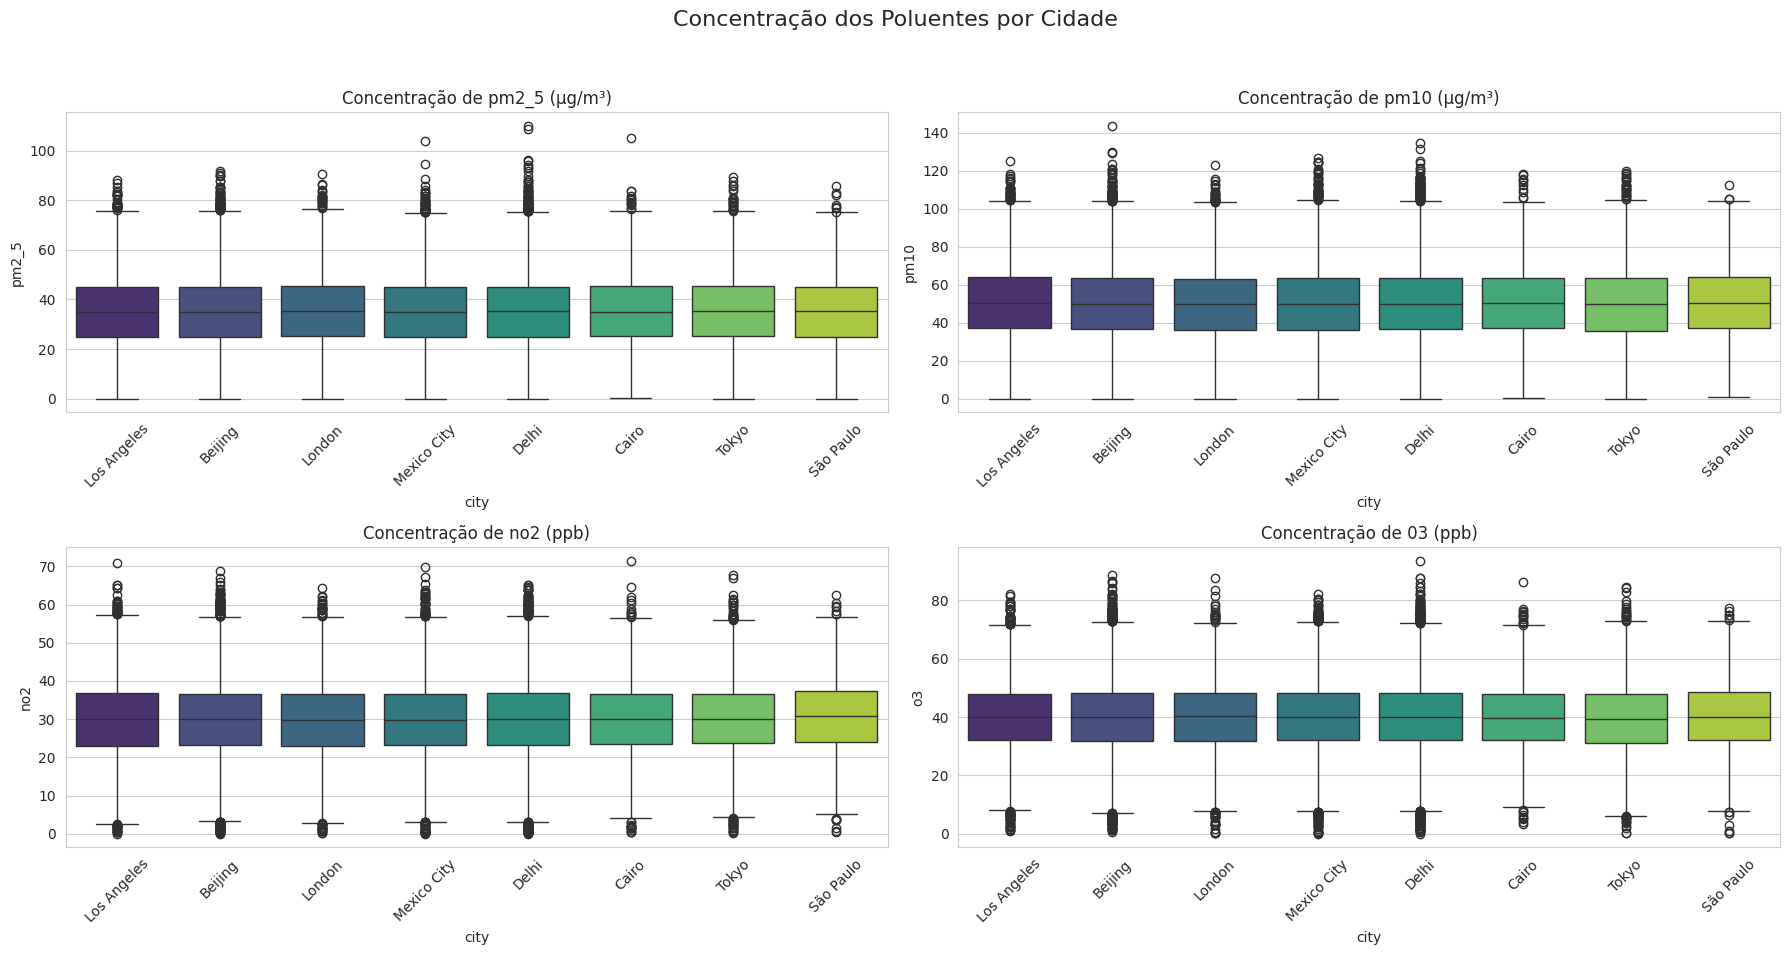

In [54]:
# Boxplot de Concentração de PM2.5 (μg/m³) por cidade
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Concentração dos Poluentes por Cidade', fontsize=16)

# PM2.5
sns.boxplot(x='city', y='pm2_5', data=df, ax=axes[0, 0], palette='viridis').set_title('Concentração de pm2_5 (μg/m³)')
axes[0, 0].tick_params(axis='x', rotation=45)

# PM10
sns.boxplot(x='city', y='pm10', data=df, ax=axes[0, 1], palette='viridis').set_title('Concentração de pm10 (μg/m³)')
axes[0, 1].tick_params(axis='x', rotation=45)

# NO2
sns.boxplot(x='city', y='no2', data=df, ax=axes[1, 0], palette='viridis').set_title('Concentração de no2 (ppb)')
axes[1, 0].tick_params(axis='x', rotation=45)

# O3
sns.boxplot(x='city', y='o3', data=df, ax=axes[1, 1], palette='viridis').set_title('Concentração de 03 (ppb)')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Análise:


*   **Variabilidade entre Cidades**: Fica claro que há uma variação significativa nas concentrações de todos os poluentes entre as diferentes cidades. Algumas cidades consistentemente apresentam níveis mais altos de certos poluentes do que outras.
*   **Distribuição dos Poluentes:** Os boxplots nos dão uma ideia da distribuição (mediana, quartis, faixa) dos poluentes em cada cidade. Podemos ver onde a maior parte dos dados se concentra e a extensão da variação.
*   **Outliers**: A presença de outliers (pontos fora dos "bigodes") indica dias ou períodos em que a concentração de um poluente em uma determinada cidade foi excepcionalmente alta ou baixa em comparação com a norma para aquela cidade.

Insights Específicos por Poluente e Cidade:

*   **pm2_5**: Podemos identificar cidades com medianas de PM2.5 mais altas (indicando poluição mais persistente) e cidades com maior dispersão ou mais outliers de alta concentração. Por exemplo, algumas cidades (Delhi e Beijing) parecem ter níveis de PM2.5 consistentemente mais elevados.
*   **pm10**: Similar ao PM2.5, observamos diferenças na distribuição de PM10 entre as cidades. Algumas cidades podem ter problemas com PM10 mais do que com PM2.5, ou vice-versa.
*   **no2**: As concentrações de dióxido de nitrogênio também variam. O NO2 é frequentemente associado ao tráfego de veículos, então cidades com maior densidade de tráfego podem apresentar níveis mais altos.
*   **o3**: O Ozônio é um poluente secundário formado pela reação de outros poluentes na presença da luz solar. Podemos observar se há padrões sazonais ou se algumas cidades têm condições mais propícias para a formação de ozônio.

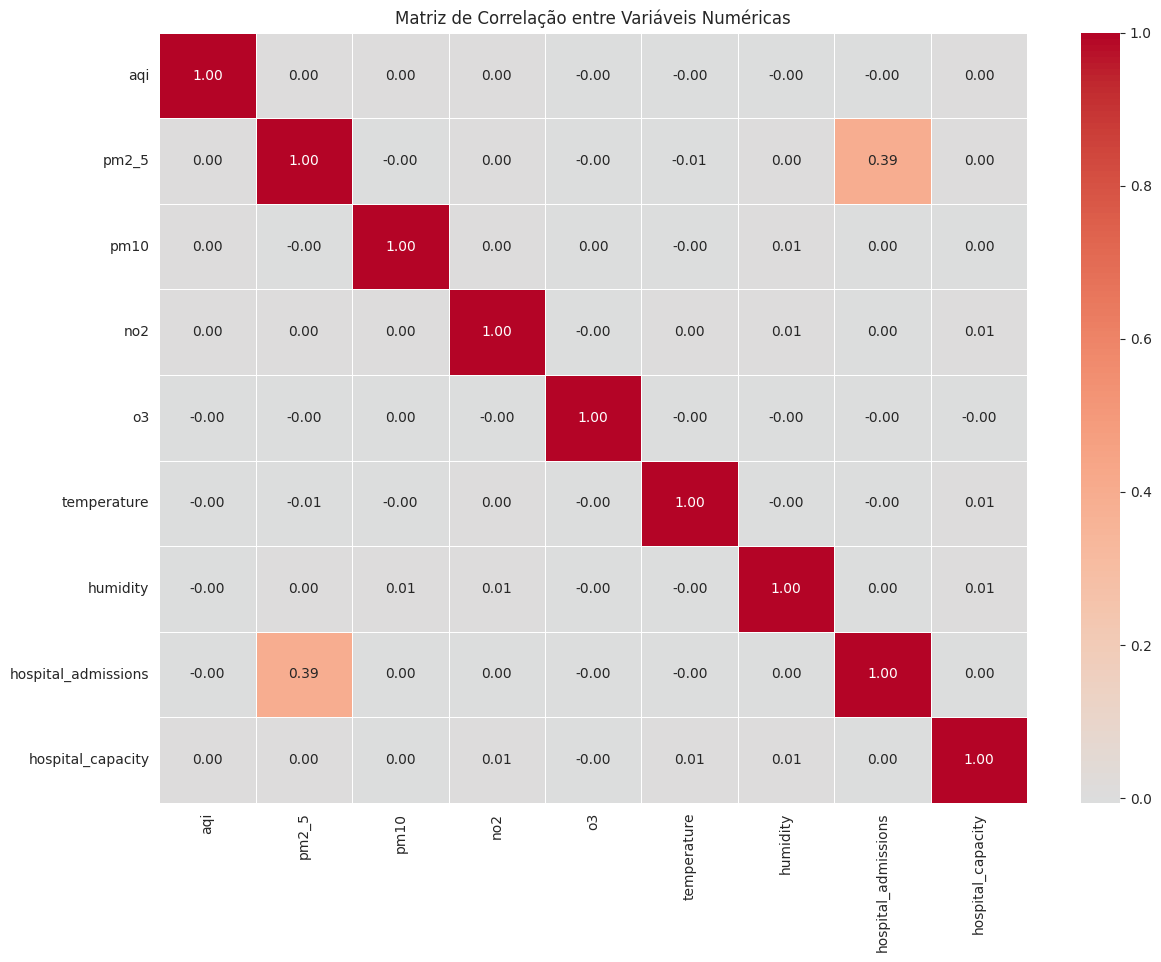

In [55]:
# Matriz de correlação
# Primeiro, selecionamos apenas as colunas numéricas para a correlação
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, center=0)

plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

Análise:

Olhando para a matriz de correlação gerada, podemos tirar os seguintes insights:

**Correlações Fortes**: A correlação entre PM2.5 e hospital_admissions é de aproximadamente 0.39. Embora não seja uma correlação extremamente alta, é a correlação positiva mais notável entre as variáveis de poluição e as métricas de saúde. Isso sugere que, à medida que os níveis de PM2.5 aumentam, há uma tendência de aumento no número de internações hospitalares por problemas respiratórios. Esta é uma descoberta importante e alinha-se com a Hipótese 2 que formulamos no início (Material particulado (PM2.5 e PM10) terá o impacto mais significativo nas internações por doenças respiratórias e casos de asma).

**Correlações Fracas:** Para a maioria dos outros pares de variáveis, as correlações são muito próximas de zero (valores entre -0.1 e 0.1). Isso indica que não há uma relação linear forte entre essas variáveis. Por exemplo, AQI, PM10, NO2, O3, temperature, humidity e hospital_capacity mostram correlações muito fracas com as métricas de saúde (hospital_admissions).
Hipótese 1: A matriz de correlação não suporta fortemente a Hipótese 1 (Há uma correlação positiva forte entre o Índice de Qualidade do Ar (AQI) e todas as métricas de saúde). A correlação entre AQI e hospital_admissions é quase zero (-0.000393).

**Outras Correlações entre Poluentes e Clima**: As correlações entre os diferentes poluentes (PM2.5, PM10, NO2, O3) e as variáveis climáticas (temperature, humidity) também são geralmente fracas.
Em resumo:

O insight mais relevante da matriz de correlação é a correlação positiva moderada entre PM2.5 e hospital_admissions. Isso sugere que a concentração de PM2.5 pode ser um fator mais diretamente relacionado ao número de internações por problemas respiratórios do que outros poluentes ou o AQI geral, dentro deste dataset.

As outras correlações fracas indicam que uma análise linear simples pode não capturar completamente as relações entre as demais variáveis, ou que essas variáveis têm pouca relação linear entre si. Outras formas de análise ou modelagem podem ser necessárias para explorar relações não lineares ou interações entre variáveis.

In [56]:
# Verificando valores faltantes
print("Contagem de valores nulos por coluna:")
df.isnull().sum()

Contagem de valores nulos por coluna:


,0
city,0
date,0
aqi,0
pm2_5,0
pm10,0
no2,0
o3,0
temperature,0
humidity,0
hospital_admissions,0


Análise:
O resultado mostra que não há valores faltantes no dataset. Isso simplifica a etapa de pré-processamento, pois não precisaremos aplicar técnicas de imputação de dados.

# Pré-processamento de Dados

Com base na análise exploratória, realizaremos agora algumas operações de pré-processamento para preparar os dados para uma eventual modelagem.

In [57]:
# Conversão da coluna 'Date'
df_processed = df.copy() # Criar uma cópia para manter o original intacto
df_processed['date'] = pd.to_datetime(df_processed['date'])

print("Tipo de dado da coluna 'Date' após conversão:")
print(df_processed.info())

Tipo de dado da coluna 'Date' após conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   city                 88489 non-null  object        
 1   date                 88489 non-null  datetime64[ns]
 2   aqi                  88489 non-null  int64         
 3   pm2_5                88489 non-null  float64       
 4   pm10                 88489 non-null  float64       
 5   no2                  88489 non-null  float64       
 6   o3                   88489 non-null  float64       
 7   temperature          88489 non-null  float64       
 8   humidity             88489 non-null  int64         
 9   hospital_admissions  88489 non-null  int64         
 10  population_density   88489 non-null  object        
 11  hospital_capacity    88489 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)

A conversão da coluna Date para o formato datetime é fundamental. Ela nos permite tratar os dados como uma série temporal, extrair componentes como mês ou dia da semana, e realizar visualizações e análises baseadas no tempo

## One-Hot Encoding

In [58]:
# One-Hot Encoding da coluna 'city'
df_encoded = pd.get_dummies(df_processed, columns=['city'], prefix='city')
print("Dataset com a coluna 'city' transformada em One-Hot Encoding:")

# Remover a coluna  'date' (não será usada como feature direta no modelo)
df_final = df_encoded.drop(['date'], axis=1)

print("Dataset pronto para a separação de features e target:")
df_final.head()

Dataset com a coluna 'city' transformada em One-Hot Encoding:
Dataset pronto para a separação de features e target:


,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,city_Beijing,city_Cairo,city_Delhi,city_London,city_Los Angeles,city_Mexico City,city_São Paulo,city_Tokyo
0,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337,False,False,False,False,True,False,False,False
1,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545,True,False,False,False,False,False,False,False
2,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539,False,False,False,True,False,False,False,False
3,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552,False,False,False,False,False,True,False,False
4,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631,False,False,True,False,False,False,False,False


In [59]:
print(f"Total de instâncias: {len(df_final)}")
print(df_final.info())

Total de instâncias: 88489
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   aqi                  88489 non-null  int64  
 1   pm2_5                88489 non-null  float64
 2   pm10                 88489 non-null  float64
 3   no2                  88489 non-null  float64
 4   o3                   88489 non-null  float64
 5   temperature          88489 non-null  float64
 6   humidity             88489 non-null  int64  
 7   hospital_admissions  88489 non-null  int64  
 8   population_density   88489 non-null  object 
 9   hospital_capacity    88489 non-null  int64  
 10  city_Beijing         88489 non-null  bool   
 11  city_Cairo           88489 non-null  bool   
 12  city_Delhi           88489 non-null  bool   
 13  city_London          88489 non-null  bool   
 14  city_Los Angeles     88489 non-null  bool   
 15  city_Mexi

Modelos de machine learning não conseguem interpretar variáveis categóricas textuais como 'city'. O One-Hot Encoding transforma a coluna 'city' em múltiplas colunas binárias (0 ou 1), uma para cada cidade. Isso permite que o modelo utilize a informação de localidade sem assumir uma ordem ou relação incorreta entre as cidades, a coluna date foi removida pois não será usada como feature no modelo.

## Separação de Features (X) e Target (y)

O próximo passo é separar nosso dataset em variáveis independentes (features, ou 'X'), que serão usadas para fazer previsões, e a variável dependente (target, ou 'y'), que é o que queremos prever. Para este exemplo, vamos definir hospital_admissions: como nosso alvo.

In [60]:
# Separando features e target
# X contém todas as colunas, exceto as de desfechos de saúde
features = df_final.drop(['hospital_admissions', 'population_density'], axis=1)
target = df_final['hospital_admissions']

X = features
y = target

print("Shape das features (X):", X.shape)
print("Shape do target (y):", y.shape)

Shape das features (X): (88489, 16)
Shape do target (y): (88489,)


Agora, dividimos os dados em um conjunto de treinamento e um conjunto de teste. O modelo aprenderá os padrões a partir dos dados de treino. Os dados de teste serão mantidos separados e usados no final para avaliar o desempenho do modelo em dados 'novos', que ele nunca viu antes. Isso é essencial para garantir que nosso modelo generalize bem e não esteja apenas 'decorando' os dados de treino.

## Divisão em Conjuntos de Treino e Teste

In [61]:
# Divisão em Treino e Teste
# Dividindo os dados: 80% para treino, 20% para teste
# random_state garante que a divisão seja a mesma toda vez que o código for executado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (70791, 16)
Shape de X_test: (17698, 16)
Shape de y_train: (70791,)
Shape de y_test: (17698,)


## Normalização (Min-Max Scaling)

A normalização redimensiona os dados para um intervalo fixo, geralmente entre 0 e 1. É útil para algoritmos que não assumem uma distribuição específica dos dados, como k-NN e redes neurais. É crucial que o scaler seja ajustado (fit) apenas com os dados de treino (X_train) para evitar vazamento de informações do conjunto de teste para o processo de treinamento.

In [62]:
# 1. Inicializar o MinMaxScaler
min_max_scaler = MinMaxScaler()

# 2. Aprender os valores min e max APENAS de X_train
min_max_scaler.fit(X_train)

# 3. Usar o scaler treinado para transformar X_train e X_test
X_train_normalized = min_max_scaler.transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

# 4. Exibir as primeiras linhas dos dados normalizados (como DataFrame)
df_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
print("Primeiras linhas do conjunto de treino normalizado:")
display(df_train_normalized.head())

Primeiras linhas do conjunto de treino normalizado:


,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_capacity,city_Beijing,city_Cairo,city_Delhi,city_London,city_Los Angeles,city_Mexico City,city_São Paulo,city_Tokyo
0,0.895792,0.020928,0.597213,0.519608,0.542277,0.840000,0.378378,0.664443,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.839679,0.118289,0.427178,0.459384,0.478016,0.417778,0.175676,0.628014,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.659319,0.080073,0.349826,0.523810,0.621195,0.726667,0.094595,0.180092,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.549098,0.404004,0.395122,0.204482,0.481398,0.760000,0.540541,0.710108,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.042084,0.226570,0.209756,0.519608,0.448703,0.742222,0.891892,0.923037,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


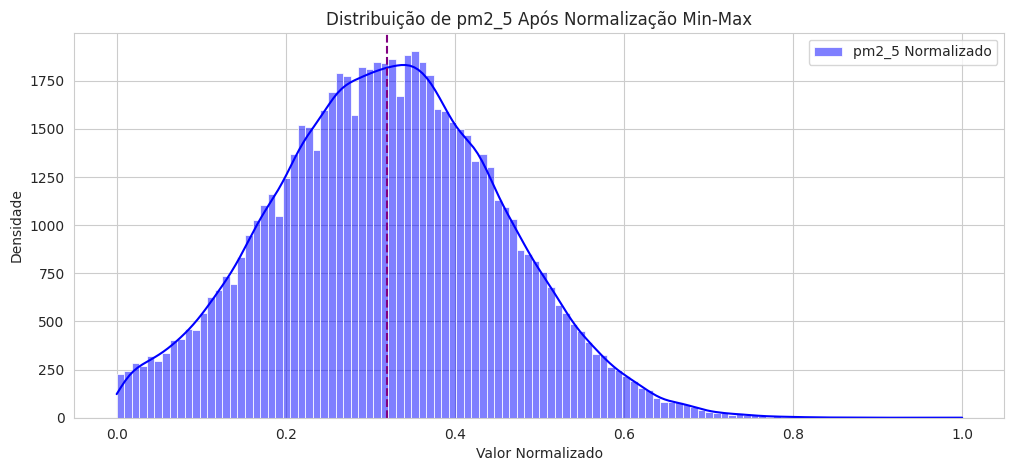

In [63]:
# 5. Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(12, 5))
sns.histplot(df_train_normalized['pm2_5'], kde=True, label='pm2_5 Normalizado', color='blue')
plt.axvline(df_train_normalized['pm2_5'].mean(), color='purple', linestyle='--')
plt.title('Distribuição de pm2_5 Após Normalização Min-Max')
plt.xlabel('Valor Normalizado')
plt.ylabel('Densidade')
plt.legend()
plt.show()

O histograma de *PM2.5* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original

## Padronização (Standardization)

A padronização transforma os dados para que tenham uma média de 0 e um desvio padrão de 1. É a técnica de scaling mais comum e é especialmente útil para algoritmos que assumem que os dados seguem uma distribuição Gaussiana (normal), como Regressão Linear e Regressão Logística.

In [64]:
# 1. Inicializar o StandardScaler
std_scaler = StandardScaler()

# 2. Aprender a média e o desvio padrão APENAS de X_train
std_scaler.fit(X_train)

# 3. Usar a média e o desvio padrão aprendidos de X_train para transformar ambos os conjuntos
X_train_standardized = std_scaler.transform(X_train)
X_test_standardized = std_scaler.transform(X_test)

# 4. Exibir as primeiras linhas dos dados padronizados (como DataFrame)
df_train_standardized = pd.DataFrame(X_train_standardized, columns=X.columns)
print("Primeiras linhas do conjunto de treino padronizado:")
display(df_train_standardized.head())

Primeiras linhas do conjunto de treino padronizado:


,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_capacity,city_Beijing,city_Cairo,city_Delhi,city_London,city_Los Angeles,city_Mexico City,city_São Paulo,city_Tokyo
0,1.372636,-2.222745,1.797674,0.715274,0.675425,1.177174,-0.411463,0.570852,-0.575485,-0.176216,-0.654273,-0.294026,2.969358,-0.422602,-0.140114,-0.272491
1,1.178557,-1.497754,0.565962,0.282706,0.201204,-0.288248,-1.104990,0.444430,-0.575485,-0.176216,1.528415,-0.294026,-0.336773,-0.422602,-0.140114,-0.272491
2,0.554730,-1.782330,0.005635,0.745453,1.257801,0.783824,-1.382401,-1.110024,1.737664,-0.176216,-0.654273,-0.294026,-0.336773,-0.422602,-0.140114,-0.272491
3,0.173502,0.629791,0.333754,-1.548162,0.226163,0.899515,0.143360,0.729324,-0.575485,-0.176216,-0.654273,3.401058,-0.336773,-0.422602,-0.140114,-0.272491
4,-1.580145,-0.691455,-1.009013,0.715274,-0.015107,0.837813,1.345475,1.468269,-0.575485,-0.176216,-0.654273,-0.294026,2.969358,-0.422602,-0.140114,-0.272491


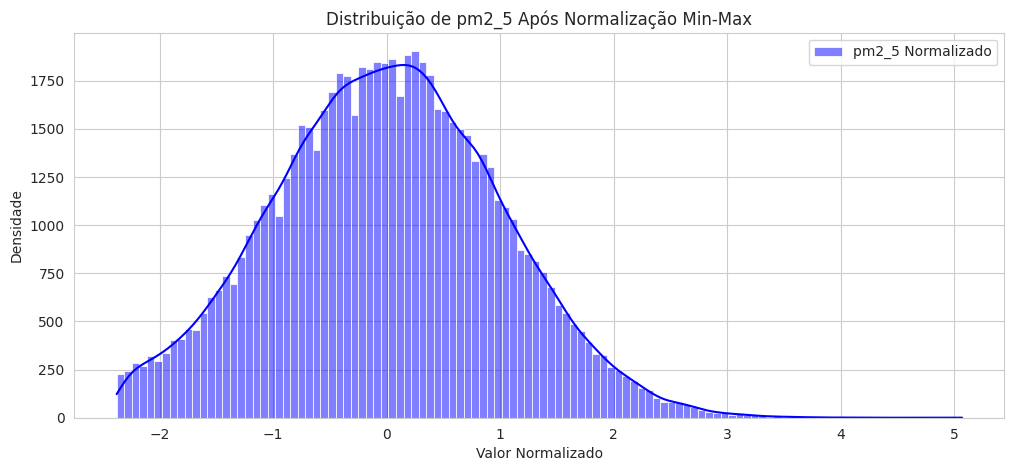

In [65]:
# 5. Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(12, 5))
sns.histplot(df_train_standardized['pm2_5'], kde=True, label='pm2_5 Normalizado', color='blue')
plt.title('Distribuição de pm2_5 Após Normalização Min-Max')
plt.xlabel('Valor Normalizado')
plt.ylabel('Densidade')
plt.legend()
plt.show()

O histograma de *PM2.5* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

Criamos agora duas visões preparadas dos nossos dados de treino e teste: uma normalizada (X_train_normalized, X_test_normalized) e outra padronizada (X_train_standardized, X_test_standardized). A escolha entre qual usar dependerá do modelo de machine learning que será aplicado na próxima etapa do projeto. Ter ambas as versões prontas nos dá flexibilidade.

# Outras Transformações e Etapas de Pré-Processamento

Com os dados limpos e divididos, podemos explorar técnicas mais avançadas para melhorar a qualidade das nossas features. O que mais poderíamos fazer?

## Engenharia de Características (Feature Engineering)
A engenharia de características consiste em usar o conhecimento do domínio do problema para criar novas features a partir das existentes. Para este dataset, a informação temporal que removemos (date) é uma fonte rica para novas características.

1. Características Temporais: Poderíamos extrair o mês, o dia da semana ou a estação do ano para capturar padrões sazonais na poluição e nos casos de saúde.

2. Características de Atraso (Lag Features): O impacto da poluição na saúde pode não ser imediato. Criar "lag features" (por exemplo, o nível de pm2_5 do dia anterior) pode ser uma feature preditiva muito poderosa.

In [66]:
# Criando uma Lag Feature
# Nota: Para fazer isso corretamente, precisaríamos reordenar o dataframe pela data antes da divisão treino/teste.
# Este é um exemplo conceitual.

# Vamos usar o df_final como base, antes do train/test split, para garantir a continuidade temporal.
# Precisamos ter certeza de que os dados estão ordenados por cidade e data.
df_temp = df_processed.sort_values(by=['city', 'date'])

# Criamos a feature de lag de 1 dia para pm2_5 para cada cidade
df_temp['pm2_5_lag_1'] = df_temp.groupby('city')['pm2_5'].shift(1)

# Esta nova coluna 'pm2_5_lag_1' conteria o valor de pm2_5 do dia anterior.
# Ela teria valores nulos para o primeiro dia de cada cidade, que precisariam ser tratados (ex: preenchendo com 0 ou a média).
print("Exemplo de Lag Feature (note o NaN na primeira entrada de cada cidade):")
display(df_temp[['city', 'date', 'pm2_5', 'pm2_5_lag_1']].head())

Exemplo de Lag Feature (note o NaN na primeira entrada de cada cidade):


,city,date,pm2_5,pm2_5_lag_1
1,Beijing,2020-01-02,33.7,NaN
9,Beijing,2020-01-10,27.1,33.7
10,Beijing,2020-01-11,56.6,27.1
14,Beijing,2020-01-15,45.0,56.6
21,Beijing,2020-01-22,31.1,45.0


Análise:

As linhas com valores NaN na lag feature (as primeiras entradas para cada grupo, neste caso, cada cidade) precisarão ser tratadas. Opções incluem remover essas linhas, preencher com 0, preencher com a média/mediana do grupo, ou usar outro método de imputação.

## Seleção de Características (Feature Selection)

Esta técnica é menos crucial para este dataset específico, com base na matriz de correlação que analisamos. Vimos que as correlações entre a maioria dos poluentes e as variáveis de saúde (exceto PM2.5) são fracas, e as correlações entre os próprios poluentes também não são extremamente altas. Isso sugere que não temos um problema grave de multicolinearidade entre as features de poluição que exigiria a remoção de variáveis altamente correlacionadas. No entanto, se tivéssemos muitas variáveis de poluição ou se elas fossem altamente correlacionadas, a seleção de características poderia ser útil para reduzir a dimensionalidade e evitar redundância.

In [67]:
# Célula de Código: Selecionando as 'k' melhores features
from sklearn.feature_selection import SelectKBest, f_regression

# Vamos selecionar as 5 melhores características do nosso conjunto de treino padronizado
k_best = 5
selector = SelectKBest(score_func=f_regression, k=k_best)

# Ajustamos o seletor aos dados de treino
X_train_selected = selector.fit_transform(X_train_standardized, y_train)
X_test_selected = selector.transform(X_test_standardized) # Apenas transformamos o teste

# Para ver quais colunas foram selecionadas
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print(f"As {k_best} características selecionadas foram:")
print(selected_features)

print("\nShape do X_train após seleção:", X_train_selected.shape)

As 5 características selecionadas foram:
Index(['pm2_5', 'o3', 'temperature', 'city_Beijing', 'city_Mexico City'], dtype='object')

Shape do X_train após seleção: (70791, 5)


Análise:

**Características Selecionadas**: As 5 features que foram consideradas mais relevantes para prever a variável alvo (hospital_admissions) pelo método SelectKBest baseado na regressão F são:

**pm2_5**: Isso está alinhado com a nossa análise da matriz de correlação, onde PM2.5 mostrou a correlação positiva mais forte com hospital_admissions.

**o3**: O Ozônio também foi selecionado como uma feature importante.
temperature: A temperatura aparece como uma feature relevante.

**city_Beijing**: A dummy variable para a cidade de Beijing foi selecionada, indicando que a cidade de Beijing tem uma relação estatisticamente significativa com o número de internações.

**city_Mexico City**: Similar a Beijing, a dummy variable para a Cidade do México também foi selecionada.

**Shape do X_train após seleção**: A forma dos dados de treino mudou de (70791, 16) (o número original de features após One-Hot Encoding) para (70791, 5). Isso confirma que o SelectKBest reduziu o número de features para as 5 melhores, conforme especificado por k_best = 5.

Implicações:

O SelectKBest identificou um subconjunto de features que têm a maior relevância estatística (medida pela pontuação F) para a variável alvo hospital_admissions.
Usar X_train_selected e X_test_selected (os conjuntos de dados transformados após a seleção) para treinar modelos pode ter vários benefícios:

Modelos mais simples e interpretáveis: Com menos features, o modelo pode ser mais fácil de entender.

Redução do risco de overfitting: Especialmente com muitos features, selecionar um subconjunto relevante pode ajudar o modelo a generalizar melhor para dados não vistos.

Redução do tempo de treinamento: Menos features significa menos cálculos para o modelo.

É interessante notar que, além dos poluentes (PM2.5 e 03) e da temperatura, a localidade (city_Beijing, city_Mexico City) também foi considerada uma feature importante, o que corrobora a Hipótese 3 (Pode haver uma diferença notável no impacto da poluição entre as diferentes cidades presentes no dataset).

Este resultado da seleção de características oferece um conjunto alternativo de features que podem ser usadas na etapa de modelagem, focando nas variáveis com maior poder preditivo linear (de acordo com o teste F de regressão).


## Redução de Dimensionalidade (PCA)

Uma abordagem alternativa à seleção de características é a redução de dimensionalidade. Em vez de remover features, a Análise de Componentes Principais (PCA) as combina em um número menor de novas características chamadas 'componentes principais'.
O PCA é potencialmente aplicável para esse dataset, especialmente para as features de poluentes. Embora as correlações entre os poluentes não sejam altíssimas, o PCA pode ser utilizado para:
Combinar as diferentes métricas de poluição (AQI, PM2.5, PM10, NO2, O3) em um número menor de componentes principais que representem a "carga geral de poluição". Isso pode ajudar a capturar a variabilidade conjunta dessas variáveis de forma mais concisa.

In [68]:
# Aplicando PCA
from sklearn.decomposition import PCA

# Vamos aplicar o PCA apenas nas colunas de poluentes do nosso dataset padronizado
pollutant_features = ['aqi', 'pm2_5', 'pm10', 'no2', 'o3']
X_train_pollutants = pd.DataFrame(X_train_standardized, columns=X.columns)[pollutant_features]

# Inicializamos o PCA, pedindo 2 componentes
pca = PCA(n_components=2)

# Ajustamos e transformamos os dados de treino
X_train_pca = pca.fit_transform(X_train_pollutants)

# Exibindo a variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelo Componente 1: {explained_variance[0]:.2%}")
print(f"Variância explicada pelo Componente 2: {explained_variance[1]:.2%}")
print(f"Variância Total Explicada com 2 componentes: {sum(explained_variance):.2%}")

# X_train_pca agora é um array com 2 colunas, que poderíamos usar para treinar um modelo
print("\nShape dos dados após PCA:", X_train_pca.shape)

Variância explicada pelo Componente 1: 20.22%
Variância explicada pelo Componente 2: 20.03%
Variância Total Explicada com 2 componentes: 40.25%

Shape dos dados após PCA: (70791, 2)


Análise:

O PCA transformou as 5 features de poluentes originais em 2 novos componentes principais.
O primeiro componente principal (Componente 1) sozinho consegue capturar aproximadamente 20.22% da variabilidade total presente nas 5 features de poluentes originais.
O segundo componente principal (Componente 2) captura aproximadamente 20.03% da variabilidade total.
Combinando os dois componentes principais, conseguimos reter cerca de 40.25% da variância total das features de poluentes originais.
Implicações:

O resultado é interessante, pois com apenas 2 componentes, conseguimos manter uma fração significativa da informação original contida nas 5 variáveis.
Isso sugere que as 5 features de poluentes originais compartilham alguma variabilidade comum que pode ser representada de forma mais compacta.
No entanto, 40.25% pode não ser suficiente, nesse caso podemos aumentar o número de componentes para capturar uma porcentagem maior da variância explicada.
Este resultado do PCA oferece uma alternativa para representar a poluição de forma mais concisa, o que pode ser explorado na etapa de modelagem.

# Conclusão

Ao final deste notebook, realizamos um ciclo completo de análise exploratória e pré-processamento. Iniciamos com a definição de um problema claro, investigamos os dados com estatísticas e visualizações, e por fim, preparamos o dataset para futuras aplicações de machine learning através da limpeza, transformação de tipos e features, e padronização. Os dados estão agora em um formato robusto e limpo, pronto para a etapa de modelagem.

Validação das hipóteses:

Hipótese 1: Há uma correlação positiva forte entre o Índice de Qualidade do Ar (AQI) e todas as métricas de saúde. Ou seja, quanto pior a qualidade do ar, maior o número de casos de doenças.


*   Avaliação: Não validada pelos dados (ou refutada por enquanto). A análise da matriz de correlação mostrou uma correlação muito fraca e próxima de zero entre AQI e hospital_admissions (-0.000393). Isso sugere que, neste dataset, o AQI geral não tem uma forte relação linear positiva com o número de internações hospitalares por problemas respiratórios. É possível que o AQI seja um índice composto que não capture a relação específica entre poluentes individuais e internações de forma linear, ou que a relação seja mais complexa e não linear.


Hipótese 2: Material particulado (PM2.5 e PM10) terá o impacto mais significativo nas internações por doenças respiratórias.


*   Avaliação: Parcialmente validada pelos dados. A análise da matriz de correlação mostrou uma correlação positiva moderada de 0.392309 entre PM2.5 e hospital_admissions. Esta foi a correlação mais forte observada entre as variáveis de poluição e as internações, suportando a ideia de que o PM2.5 tem um impacto significativo. No entanto, a correlação entre PM10 e hospital_admissions foi muito fraca (0.000537), o que não suporta a hipótese para o PM10 da mesma forma que para o PM2.5. A seleção de características usando SelectKBest também identificou PM2.5 como uma das features mais relevantes, enquanto PM10 não foi selecionado.


Hipótese 3: Pode haver uma diferença notável no impacto da poluição entre as diferentes cidades presentes no dataset.


*   Avaliação: Validada pelos gráficos de boxplot. Estes gráficos dão suporte visual à Hipótese 3 mostrando claramente que os níveis de poluição variam significativamente por cidade. Isso reforça a ideia de que a localização geográfica é um fator importante a ser considerado na análise.

Em resumo:

A Hipótese 1 não é suportada pela análise de correlação linear.

A Hipótese 2 é parcialmente suportada, com PM2.5 mostrando uma relação linear mais forte com as internações do que PM10.

A Hipótese 3 é suportada pelos resultados das visualizações dos gráficos de boxplot.

É importante notar que estas conclusões são baseadas apenas nas análises exploratórias e de pré-processamento. Um modelo de machine learning pode revelar relações mais complexas e não lineares que não são capturadas pela análise de correlação linear simples ou pelo teste F da seleção de características.